In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import lightgbm as lgb


In [2]:
path = '/data/GAMMA_hackathon/'
!ls {path}
df = pd.read_csv(path + 'customer_data.csv')

 customer_data.csv	 'Gammathon attendee Instructions.pdf'
 example_submission.csv


In [ ]:
df2 = pd.read_csv('res.csv')

In [ ]:
df2.churn.astype(float).mean()

In [3]:
df = df.sort_values('month')

In [4]:
df.describe()

,customer_id,months_since_joined,referred_friends,transaction_count,transaction_value,clv,total_reward_points,earned_reward_points
count,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07
mean,6.086582e+05,2.210391e+01,9.669775e-01,2.936650e+01,1.504392e+02,3.600556e+03,5.648918e+03,2.941982e+02
std,2.847427e+05,1.978018e+01,9.877185e-01,1.471019e+01,1.645431e+02,5.712062e+03,1.374896e+04,5.555236e+02
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.067390e+05,6.000000e+00,0.000000e+00,1.900000e+01,5.816020e+01,4.291993e+02,2.759791e+02,4.600000e+01
50%,6.195790e+05,1.600000e+01,1.000000e+00,2.600000e+01,8.558780e+01,1.130037e+03,1.068997e+03,1.000000e+02
75%,8.241590e+05,3.400000e+01,2.000000e+00,3.600000e+01,1.718362e+02,4.080206e+03,4.421000e+03,2.660000e+02
max,1.204356e+06,9.300000e+01,9.000000e+00,1.410000e+02,1.929116e+03,6.423930e+04,4.863967e+05,1.238400e+04


In [5]:
train = (df.customer_id % 10) < 3

In [6]:
cum_features =  ['referred_friends', 'transaction_count', 'transaction_value', 'earned_reward_points']

In [7]:
for feat in cum_features:
    df['cum_'+feat] = df.groupby('customer_id')[feat].cumsum()

In [8]:
df.describe()

,customer_id,months_since_joined,referred_friends,transaction_count,transaction_value,clv,total_reward_points,earned_reward_points,cum_referred_friends,cum_transaction_count,cum_transaction_value,cum_earned_reward_points
count,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07,1.143614e+07
mean,6.086582e+05,2.210391e+01,9.669775e-01,2.936650e+01,1.504392e+02,3.600556e+03,5.648918e+03,2.941982e+02,1.386087e+01,4.261847e+02,2.248129e+03,4.356872e+03
std,2.847427e+05,1.978018e+01,9.877185e-01,1.471019e+01,1.645431e+02,5.712062e+03,1.374896e+04,5.555236e+02,1.201230e+01,4.880609e+02,3.903332e+03,1.121846e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.067390e+05,6.000000e+00,0.000000e+00,1.900000e+01,5.816020e+01,4.291993e+02,2.759791e+02,4.600000e+01,4.000000e+00,9.200000e+01,2.778501e+02,2.300000e+02
50%,6.195790e+05,1.600000e+01,1.000000e+00,2.600000e+01,8.558780e+01,1.130037e+03,1.068997e+03,1.000000e+02,1.000000e+01,2.440000e+02,8.187363e+02,8.180000e+02
75%,8.241590e+05,3.400000e+01,2.000000e+00,3.600000e+01,1.718362e+02,4.080206e+03,4.421000e+03,2.660000e+02,2.100000e+01,5.780000e+02,2.363667e+03,3.169000e+03
max,1.204356e+06,9.300000e+01,9.000000e+00,1.410000e+02,1.929116e+03,6.423930e+04,4.863967e+05,1.238400e+04,7.500000e+01,5.436000e+03,6.588992e+04,3.943060e+05


In [ ]:
df.dtypes

In [32]:
cats = ['cluster']
for cat in cats:
    df[cat] = pd.Categorical(df[cat]).codes

In [ ]:
cont = ['cluster']
for cat in cats:
    df[cat] = pd.Categorical(df[cat]).codes

In [33]:
features = cum_features + ['cum_' + feat for feat in cum_features] + ['cluster', 'clv']


In [ ]:
lgb.

In [73]:
df['label'] = df.groupby('customer_id').churned.shift(-1)
df_clean = df.dropna(axis=0, subset=['label'])
train = (df_clean.customer_id % 10) < 8

x_train = df_clean[train]
x_test = df_clean[~train]

y_train = df_clean[train]['label'].astype(bool)
y_test = df_clean[~train]['label'].astype(bool)

# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train[features], y_train)
lgb_eval = lgb.Dataset(x_test[features], y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'application': 'binary',
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)


Starting training...
[1]	valid_0's binary_logloss: 0.179707
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.177029
[3]	valid_0's binary_logloss: 0.174763
[4]	valid_0's binary_logloss: 0.172952
[5]	valid_0's binary_logloss: 0.171558
[6]	valid_0's binary_logloss: 0.170409
[7]	valid_0's binary_logloss: 0.169449
[8]	valid_0's binary_logloss: 0.168616
[9]	valid_0's binary_logloss: 0.167901
[10]	valid_0's binary_logloss: 0.167248
[11]	valid_0's binary_logloss: 0.16668
[12]	valid_0's binary_logloss: 0.166211
[13]	valid_0's binary_logloss: 0.165765
[14]	valid_0's binary_logloss: 0.165383
[15]	valid_0's binary_logloss: 0.165052
[16]	valid_0's binary_logloss: 0.16475
[17]	valid_0's binary_logloss: 0.164469
[18]	valid_0's binary_logloss: 0.16421
[19]	valid_0's binary_logloss: 0.163995
[20]	valid_0's binary_logloss: 0.163793
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.163793


In [67]:
gbm.eval(lgb_eval, 'eval')

AttributeError: 'Booster' object has no attribute 'train_set'

In [75]:
x_train['p'] = gbm.predict(x_train[features])
x_test['p'] = gbm.predict(x_test[features])

/home/anton/code/BCGHack/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/anton/code/BCGHack/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
df_p = pd.concat([x_train, x_test])

In [79]:
df_p['value'] = df_p['p'] * df_p['clv']

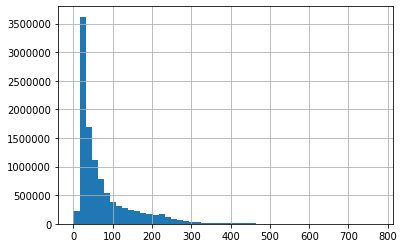

In [80]:
df_p.value.hist(bins=50)

In [ ]:
best_step_1 = df_p.sort_values('value').iloc[-10000:]

In [ ]:
best_step_1.p.mean()

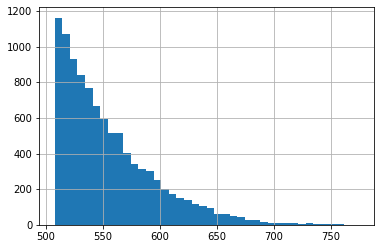

In [83]:

best_step_1.value.hist(bins=40)

In [85]:
df_p.sort_values('value').iloc[-10000:].cluster.value_counts()

1    6705
2    2425
0     870
Name: cluster, dtype: int64

In [87]:
df_p.sort_values('value').iloc[-10000:].customer_id.to_csv('submission.csv', index=False)

/home/anton/code/BCGHack/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [86]:
df.to_csv?

In [22]:
x_train.head()

,referred_friends,transaction_count,transaction_value,earned_reward_points,cum_referred_friends,cum_transaction_count,cum_transaction_value,cum_earned_reward_points,cluster,clv
343319,1,16.0,49.038831,32.0,1,31.0,94.093606,62.0,A,379.213933
343318,0,18.0,70.531096,54.0,1,34.0,129.344747,86.0,A,545.412153
343317,0,15.0,47.805180,30.0,3,31.0,95.487264,62.0,C,369.674190
343315,1,25.0,71.703089,75.0,2,49.0,144.292021,147.0,B,554.475087
343314,1,20.0,69.553305,60.0,1,40.0,137.524225,120.0,C,537.850958


In [24]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/home/anton/code/BCGHack/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: False

In [35]:
x_train.dtypes

referred_friends              int64
transaction_count           float64
transaction_value           float64
earned_reward_points        float64
cum_referred_friends          int64
cum_transaction_count       float64
cum_transaction_value       float64
cum_earned_reward_points    float64
cluster                        int8
clv                         float64
dtype: object

In [64]:
df.groupby('customer_id').churned.shift(-1).value_counts()

False    10123714
True       475591
Name: churned, dtype: int64

In [65]:
df.churned.value_counts()

False    10900272
True       535866
Name: churned, dtype: int64